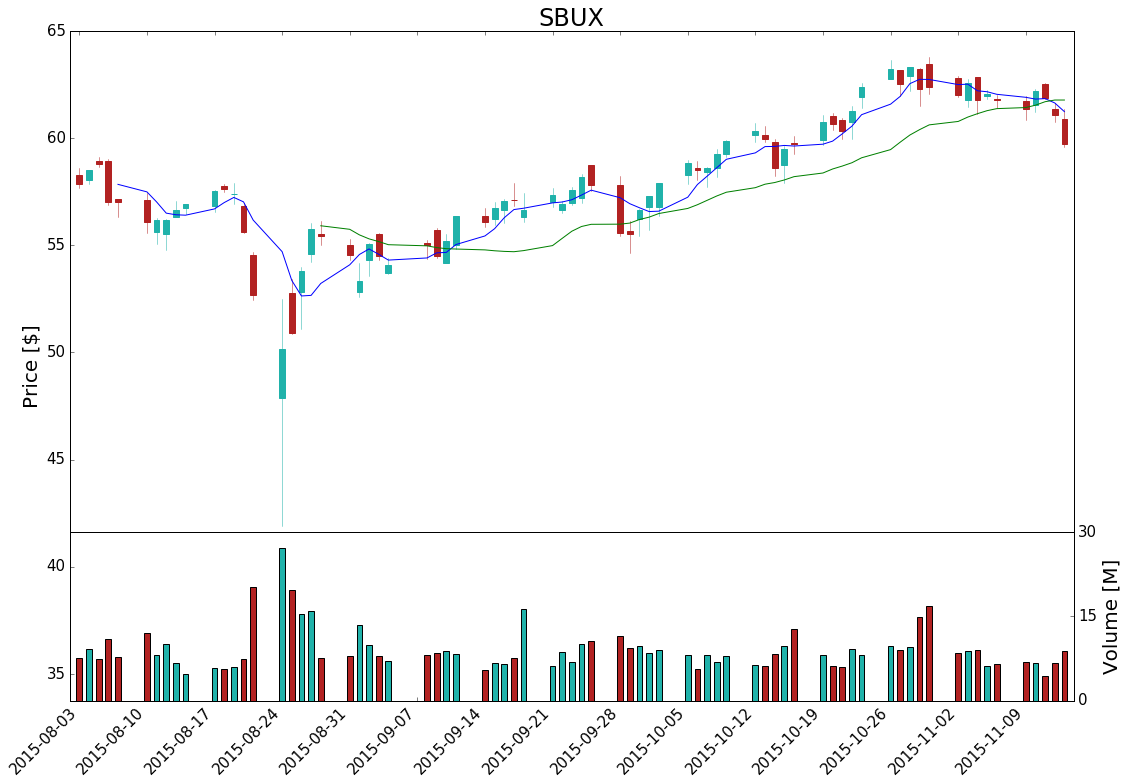

In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import matplotlib.transforms as mpt
from matplotlib.dates import num2date, date2num
import datetime

def sma( values, window ):
    weigths = np.repeat(1.0, window) / window
    smas = np.convolve(values, weigths, 'valid')
    return np.concatenate((np.ones((window - 1, )) * np.nan, smas)) # NaN padding

def ema( values, window ):
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a

def compute_macd( x, slow=26, fast=12 ):
    return 0

stock = 'SBUX'
g = '#20B2AA'
r = '#B22222'

quotes = np.array(mpf.quotes_historical_yahoo_ochl(stock, (2015, 8, 1), (2015, 12, 1)))

fig = plt.figure()
plt.title(stock, fontsize = 24)
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_ylabel('Price [$]', size = 20)
mpf.candlestick_ochl(ax1, quotes, width = 0.6, colorup = g, colordown = r)

# shift y-limits of the candlestick plot so that there is space at the bottom for the volume bar chart
pad = 0.25
yl = ax1.get_ylim()
ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad, yl[1])
ax1.tick_params(labelsize = 15)

ax1.plot(quotes[:, 0], sma(quotes[:, 2], 5))
ax1.plot(quotes[:, 0], sma(quotes[:, 2], 20))


# create the second axis for the volume bar-plot
ax2 = ax1.twinx()

# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(mpt.Bbox([[0.125, 0.125], [0.9, 0.32]]))

# get data from candlesticks for a bar plot
dates = quotes[:, 0]
volume = quotes[:, -1] / 1e6

# make bar plots and color differently depending on up/down for the day
pos = quotes[:, 1] - quotes[:, 2] < 0
neg = quotes[:, 1] - quotes[:, 2] > 0
ax2.bar(dates[pos], volume[pos], color=g, width=0.6, align='center')
ax2.bar(dates[neg], volume[neg], color=r, width=0.6, align='center')

#scale the x-axis tight
ax2.set_xlim(min(dates) - 1, max(dates) + 1)

# the y-ticks for the bar were too dense, keep only every third one
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume [M]', size = 20)
ax2.tick_params(axis='y', labelsize=15)

# format the x-ticks with a human-readable date. 
xt = []
date_range = np.arange(min(dates), max(dates))

# Display only on Monday
for i in date_range:
    if datetime.date.isoweekday(num2date(i)) == 1:
        xt += [i]
new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
plt.xticks(xt)
ax1.set_xticklabels(new_xticks, rotation=45, horizontalalignment='right')

plt.gcf().set_size_inches(18, 12)

plt.show()

In [20]:
quotes[15, :]

array([  7.35834000e+05,   4.78949246e+01,   5.01775350e+01,
         5.25000133e+01,   4.19142888e+01,   2.71588000e+07])